In [1]:
import sys
import os
import pandas as pd


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.eda.time_series_analysis import (
    prepare_datetime,
    publication_frequency,
    detect_spikes,
    hourly_publication_distribution,
    weekday_publication_distribution
)


In [2]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")
df = prepare_datetime(df, "date")
df[["date", "date_only", "hour", "weekday"]].head()


,date,date_only,hour,weekday
0,2020-06-05 10:30:54-04:00,2020-06-05,10.0,Friday
1,2020-06-03 10:45:20-04:00,2020-06-03,10.0,Wednesday
2,2020-05-26 04:30:07-04:00,2020-05-26,4.0,Tuesday
3,2020-05-22 12:45:06-04:00,2020-05-22,12.0,Friday
4,2020-05-22 11:38:59-04:00,2020-05-22,11.0,Friday


In [3]:
daily_counts = publication_frequency(df)
daily_counts.head()


date_only
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
dtype: int64

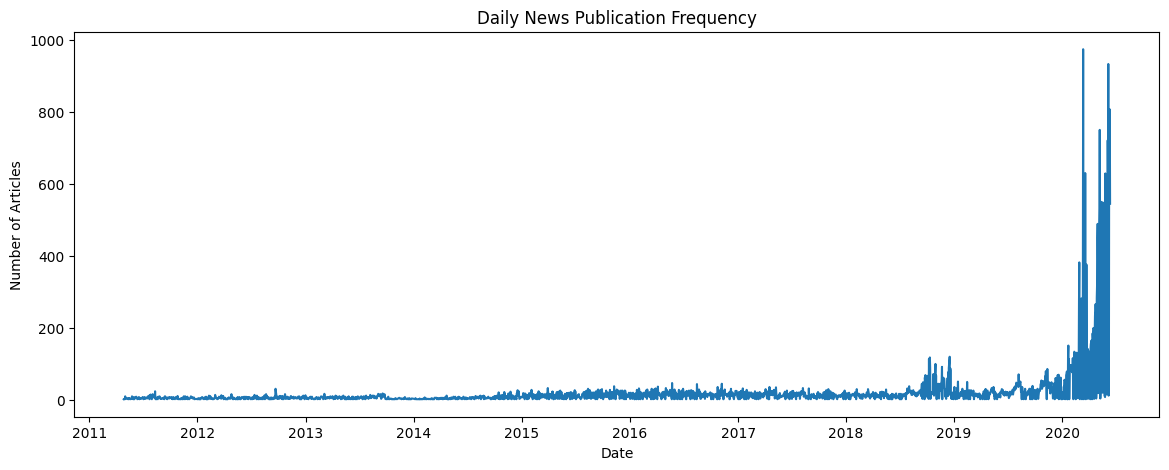

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
daily_counts.plot(title="Daily News Publication Frequency")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


In [5]:
spikes = detect_spikes(daily_counts)
spikes


date_only
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    180
2020-04-21    233
2020-04-22    245
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    531
2020-05-07    749
2020-05-08    508
2020-05-11    485
2020-05-12    387
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
dtype: int64

In [6]:
hourly_counts = hourly_publication_distribution(df)
hourly_counts


hour
0.0       67
1.0       14
2.0       57
3.0       93
4.0     1469
5.0     1829
6.0     2476
7.0     5033
8.0     5527
9.0     5965
10.0    7669
11.0    5701
12.0    5732
13.0    2710
14.0    2075
15.0    1612
16.0    3939
17.0    2800
18.0     704
19.0     227
20.0     131
21.0      82
22.0      48
23.0      27
Name: count, dtype: int64

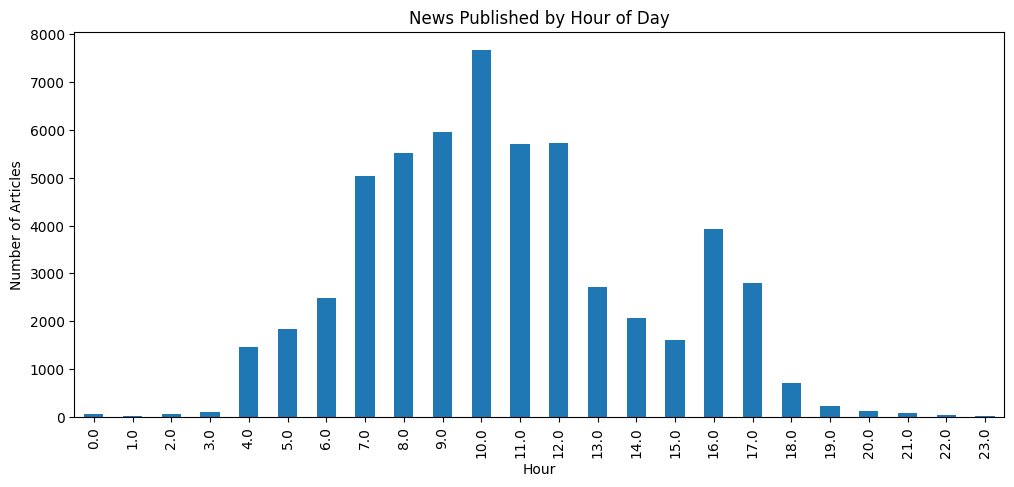

In [7]:
hourly_counts.plot(kind="bar", figsize=(12,5), title="News Published by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Articles")
plt.show()


In [8]:
weekday_counts = weekday_publication_distribution(df)
weekday_counts


weekday
Monday       10322
Tuesday      11002
Wednesday    11891
Thursday     12688
Friday        9381
Saturday       267
Sunday         436
Name: count, dtype: int64

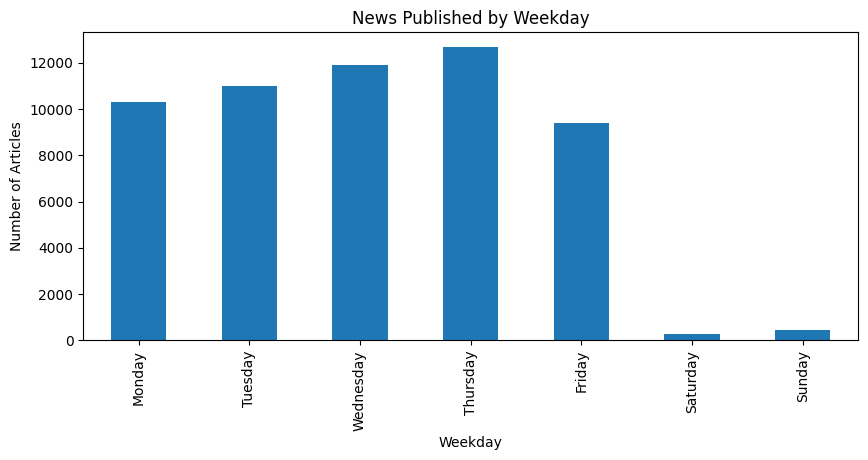

In [9]:
weekday_counts.plot(kind="bar", figsize=(10,4), title="News Published by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Articles")
plt.show()
